In [1]:
#Jie Long
#First version code of ARIMA
#This code is a simple tutorial to show deal with time series data and final did a stock price prediction roughly
#Future, will do error analysis

In [1]:
import pandas as pd
import numpy as np

# PANDAs Rolling Window

In [25]:
import matplotlib.pylab as plt
%matplotlib inline

In [26]:
df = pd.Series(np.random.randn(600),index = pd.date_range("7/01/2016",freq="D",periods=600))
df.head()

2016-07-01   -0.214374
2016-07-02   -0.331999
2016-07-03   -1.118721
2016-07-04   -1.644257
2016-07-05   -0.053086
Freq: D, dtype: float64

In [27]:
r = df.rolling(window=10)
r

Rolling [window=10,center=False,axis=0]

In [28]:
#r.mean r.median r.std r.skew r.sum r.var
print(r.mean())

2016-07-01         NaN
2016-07-02         NaN
2016-07-03         NaN
2016-07-04         NaN
2016-07-05         NaN
                ...   
2018-02-16   -0.163764
2018-02-17   -0.260170
2018-02-18   -0.384752
2018-02-19   -0.199121
2018-02-20   -0.126865
Freq: D, Length: 600, dtype: float64


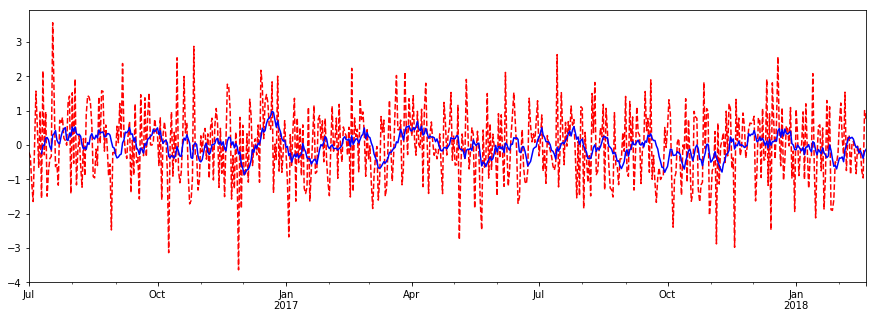

In [29]:
plt.figure(figsize=(15,5))
df.plot(style='r--')
df.rolling(window=10).mean().plot(style='b')

In [36]:
#Staionarity check

#TSA from statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

#Display and Plotting
import seaborn as sns
pd.set_option('display.float_format',lambda x:'%.5f' %x)
np.set_printoptions(precision=5,suppress=True)

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

#seborn plotting style
sns.set(style='ticks',context='poster')

In [37]:
#read the data
Sentiment = pd.read_csv("sentiment.csv",index_col=0,parse_dates=[0])

In [39]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [42]:
sentiment_short = Sentiment.loc['2005':'2016']

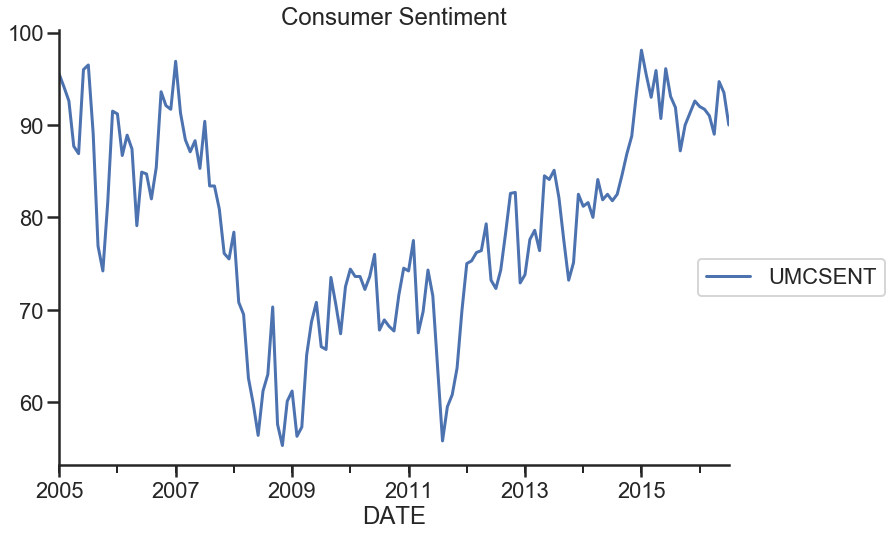

In [43]:
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title("Consumer Sentiment")
sns.despine()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27ee8a50>,
      dtype=object)

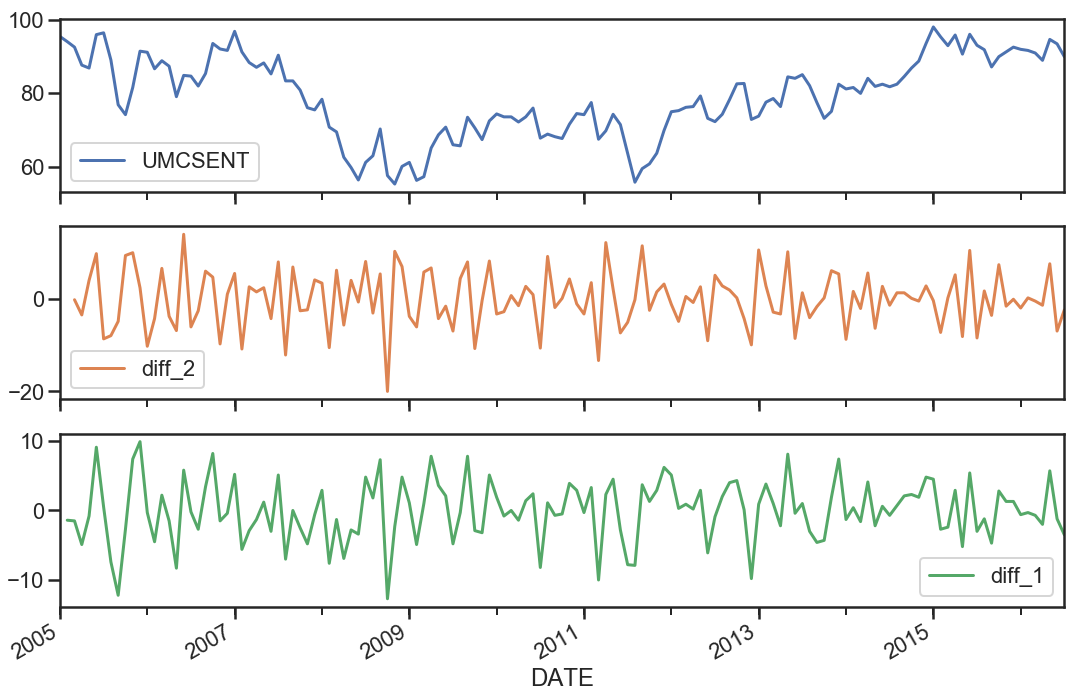

In [79]:
sentiment_short['diff_1'] = sentiment_short['UMCSENT'].diff(1)
sentiment_short['diff_2'] = sentiment_short['diff_1'].diff(1)
sentiment_short.plot(subplots=True,figsize=(18,12))

In [80]:
sentiment_short['diff_1']
del sentiment_short['diff_1']#delete the column first \
del sentiment_short['diff_2']

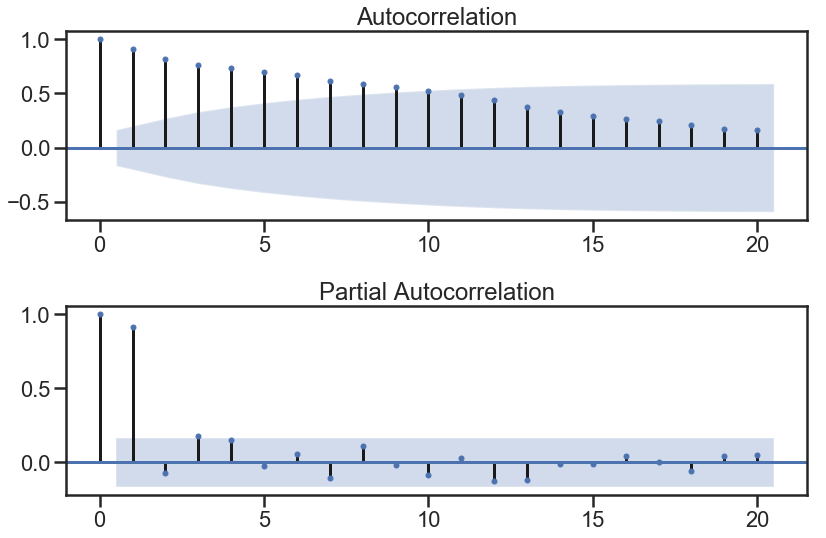

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fog=sm.graphics.tsa.plot_acf(sentiment_short,lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sentiment_short,lags=20,ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [66]:
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig = plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hist_ax = plt.subplot2grid(layout,(0,1))
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax,acf_ax,pacf_ax

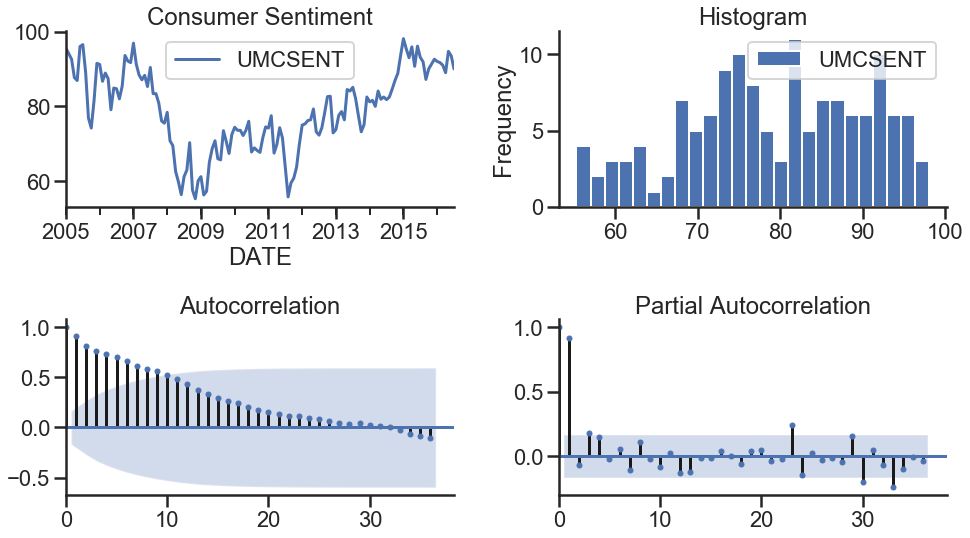

In [81]:
a,b,c = tsplot(sentiment_short,title="Consumer Sentiment",lags='36')

In [82]:
ts_df = pd.read_csv("series1.csv",index_col=0,parse_dates=[0])
n_samples = ts_df.shape[0]

In [83]:
print(ts_df.shape)
print(ts_df.head())

(120, 1)
              value
2006-06-01  0.21507
2006-07-01  1.14225
2006-08-01  0.08077
2006-09-01 -0.73952
2006-10-01  0.53552


In [85]:
#create a training sample and testing sample before analyzing time series data

n_train = int(0.95*n_samples)+1
n_forecast = n_samples-n_train

ts_train = ts_df.iloc[:n_train]['value']
ts_test = ts_df.iloc[n_train:]['value']
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:","\n",ts_train.tail(),"\n")
print("Testing Series:","\n",ts_test.head())

(115,)
(5,)
Training Series: 
 2015-08-01    0.60371
2015-09-01   -1.27372
2015-10-01   -0.93284
2015-11-01    0.08552
2015-12-01    1.20534
Name: value, dtype: float64 

Testing Series: 
 2016-01-01    2.16411
2016-02-01    0.95226
2016-03-01    0.36485
2016-04-01   -2.26487
2016-05-01   -2.38168
Name: value, dtype: float64


(<matplotlib.axes._subplots.AxesSubplot at 0x1a27e6e910>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a27f13c90>)

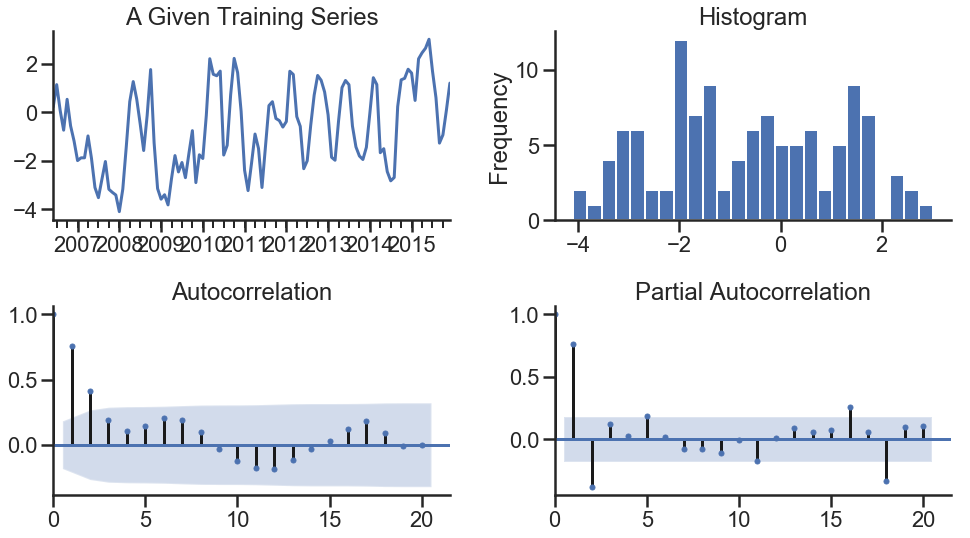

In [87]:
tsplot(ts_train,title = "A Given Training Series",lags='20')

In [88]:
#Model Estimation 
#fit the model
arima200 = sm.tsa.SARIMAX(ts_train,order=(2,0,0))
model_results = arima200.fit()

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [101]:
import itertools 
 
p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

#initialize a dataframe to store the reults
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                         columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),#想当于一个嵌套循环
                              range(d_min,d_max+1),
                              range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p),"MA{}".format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(ts_train,order=(p,d,q))
        results = model.fit()
        results_bic.loc['AR{}'.format(p),"MA{}".format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarni

Text(0.5,1,'BIC')

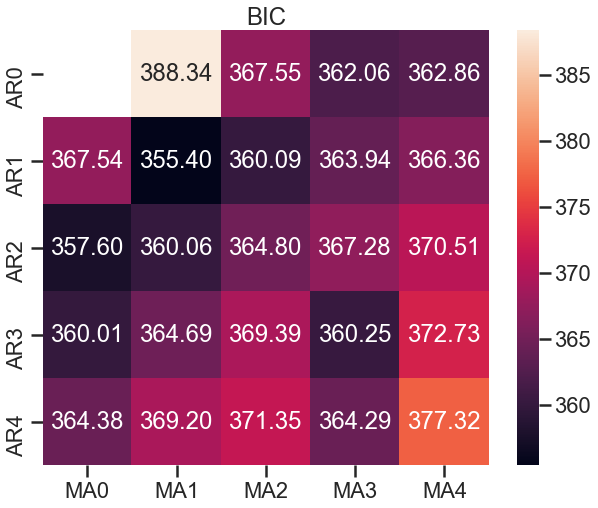

In [103]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(results_bic,mask = results_bic.isnull(),ax=ax,annot=True,fmt=".2f");
ax.set_title("BIC")

In [106]:
train_results = sm.tsa.arma_order_select_ic(ts_train,ic=['aic',
                                                        'bic'],trend='nc',max_ar = 4,max_ma = 4)
print("BIC",train_results.bic_min_order)
print("AIC",train_results.aic_min_order)

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


BIC (1, 1)
AIC (4, 2)


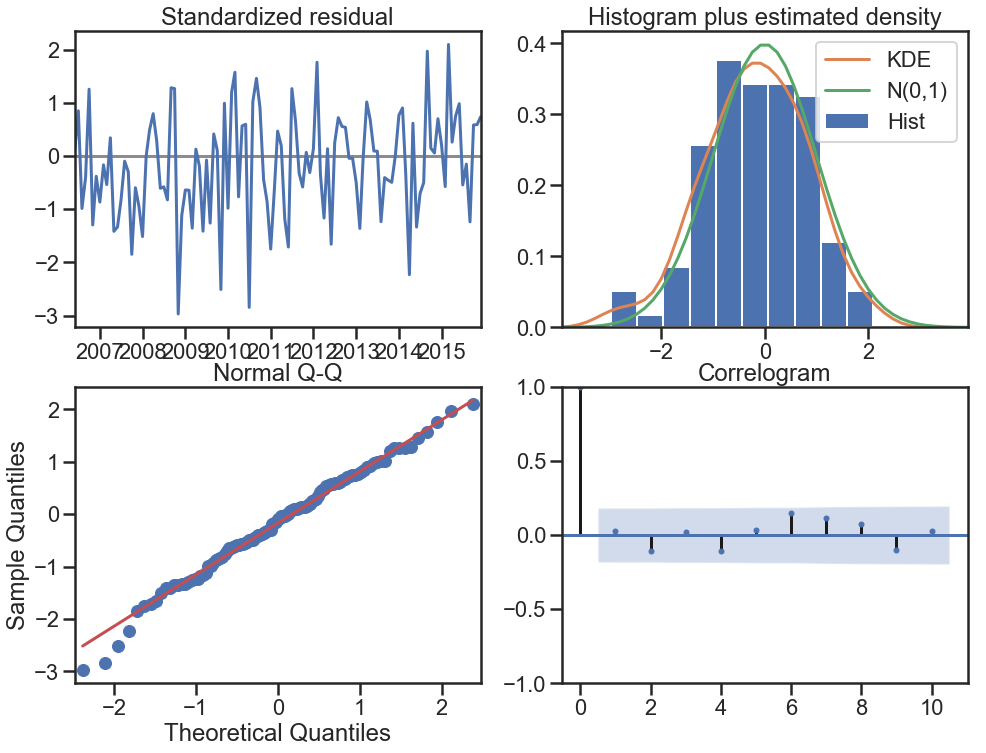

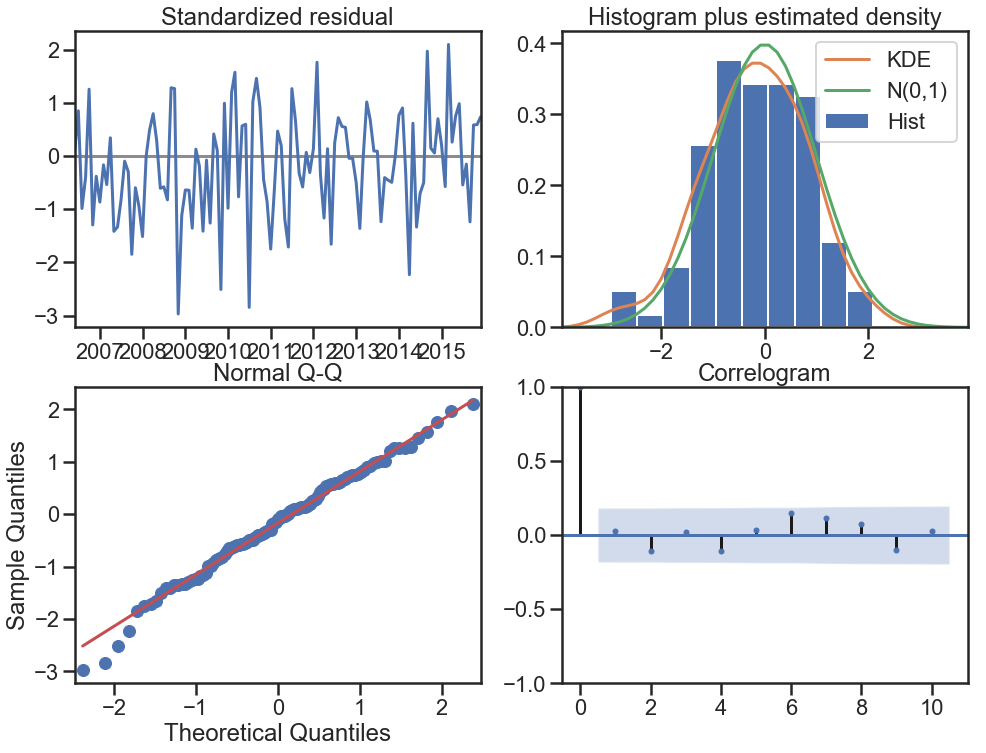

In [108]:
#residual analysis
model_results.plot_diagnostics(figsize=(16,12))

In [114]:
import yfinance as yf
stock = yf.Ticker('AAPL').history(period="max")
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-24,236.36000,247.69000,234.30000,246.88000,71882800,0.00000,0.00000
2020-03-25,250.75000,258.25000,244.30000,245.52000,75900500,0.00000,0.00000
2020-03-26,246.52000,258.68000,246.36000,258.44000,63021800,0.00000,0.00000
2020-03-27,252.75000,255.87000,247.05000,247.74000,51054200,0.00000,0.00000
2020-03-30,250.74000,255.52000,249.40000,254.81000,41938500,0.00000,0.00000


In [112]:
type(stock)

pandas.core.frame.DataFrame

In [122]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2019']

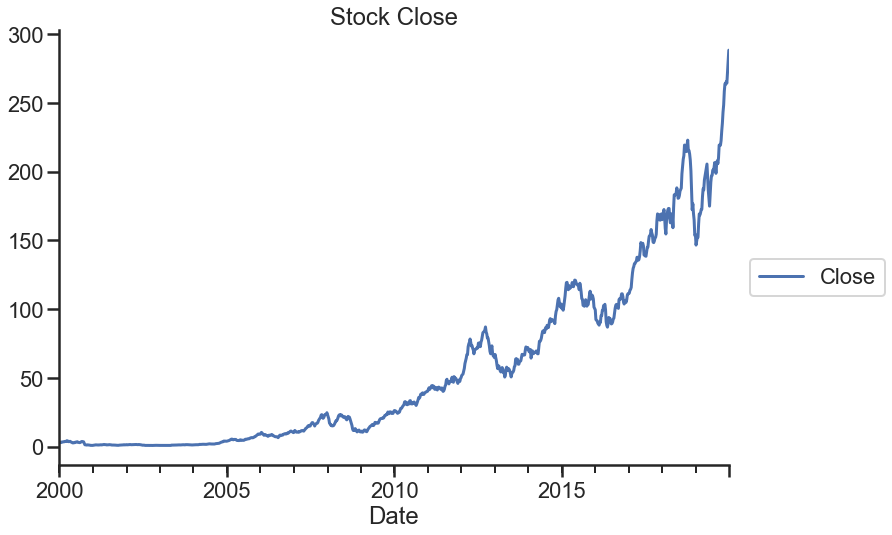

In [123]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title("Stock Close")
sns.despine()

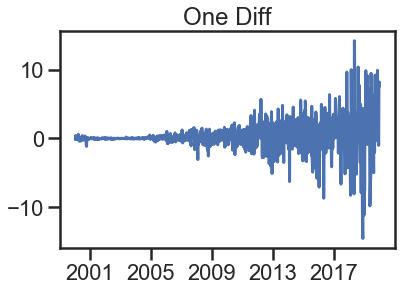

In [124]:
stock_diff = stock_train.diff(1)
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title("One Diff")
plt.show()

In [125]:
acf = plot_acf(stock_diff,lags=31)
plt.title()

NameError: name 'plot_acf' is not defined

(<matplotlib.axes._subplots.AxesSubplot at 0x1a27ab2f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a29d49750>)

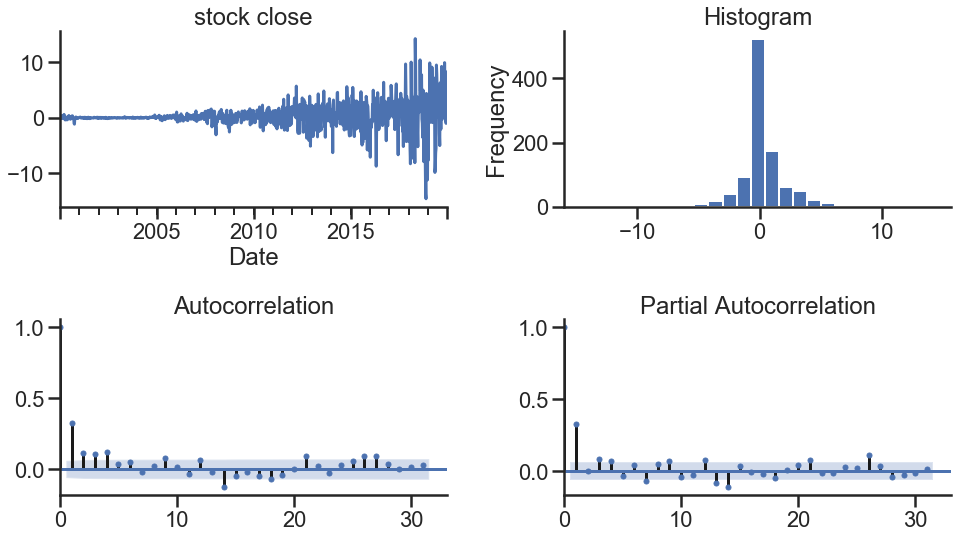

In [128]:
tsplot(stock_diff,title = "stock close",lags='31')

In [141]:
stock_results = sm.tsa.arma_order_select_ic(stock_diff,ic=['aic',
                                                        'bic'],trend='nc',max_ar = 4,max_ma = 6)
print("BIC",stock_results.bic_min_order)
print("AIC",stock_results.bic_min_order)

BIC (1, 0)
AIC (1, 0)


In [132]:
stock_model = sm.tsa.ARIMA(stock_train,order = (1,1,0),freq = 'W-MON')
stock_result = stock_model.fit()

In [133]:
print(stock_result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1043
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2300.308
Method:                       css-mle   S.D. of innovations              2.196
Date:                Tue, 31 Mar 2020   AIC                           4606.616
Time:                        03:43:50   BIC                           4621.466
Sample:                    01-10-2000   HQIC                          4612.248
                         - 12-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2768      0.102      2.725      0.006       0.078       0.476
ar.L1.D.Close     0.3309      0.029     11.264      0.000       0.273       0.389
                                    Root

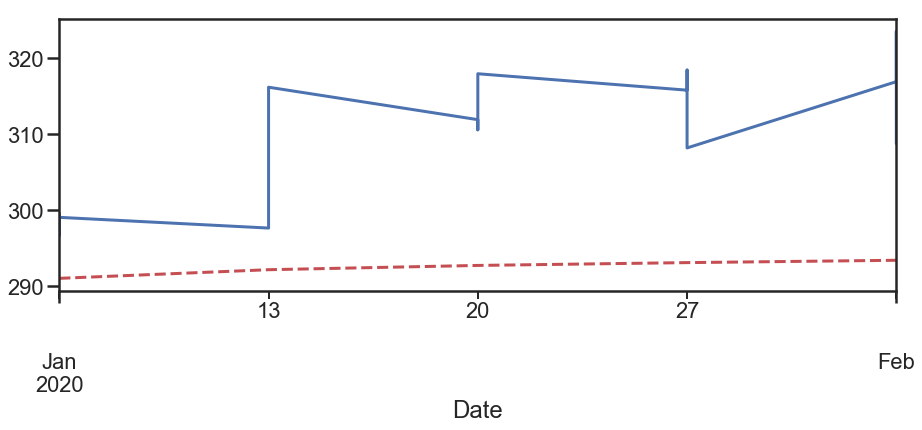

In [140]:
pred = stock_result.predict("20200101","20200201",dynamic = True, typ='levels')
plt.figure(figsize=(15,5))
pred.plot(style='r--')
stock['Close']['20200101':'20200201'].plot(style='b')